# Softmax Regression Assignment 

### Assignment to the course Artificial Intelligence 2 - Aris Tsilifonis 1115201700170

Importing the libraries for the project 

In [1]:
# For data manipulation 
import pandas as pd
# For large and multi-dimensional arrays
import numpy as np
# For data vizualization 
import matplotlib.pyplot as plt

#For algorithms
# For ML algorithms
#load all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

### Read the csv file for the train and test set

In [2]:

df_train = pd.read_csv("vaccine_train_set.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15976 non-null  int64 
 1   tweet       15976 non-null  object
 2   label       15976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 374.6+ KB


# Overview of data

#### Getting some general info about them

In [3]:
df_test = pd.read_csv("vaccine_validation_set.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2282 non-null   int64 
 1   tweet       2282 non-null   object
 2   label       2282 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.6+ KB


In [4]:
df_train.head()

,Unnamed: 0,tweet,label
0,0,Sip N Shop Come thru right now #Marjais #Popul...,0
1,1,I don't know about you but My family and I wil...,1
2,2,@MSignorile Immunizations should be mandatory....,2
3,3,President Obama spoke in favor of vaccination ...,0
4,4,"""@myfoxla: Arizona monitoring hundreds for mea...",0


In [5]:
df_test.head()

,Unnamed: 0,tweet,label
0,0,@user They had a massive surge in with covid d...,1
1,1,Required vaccines for school: Parents and guar...,0
2,2,“@KCStar: Two more Johnson County children hav...,0
3,3,NV can do better. Which states are the best (a...,2
4,4,Nothing like killing ourselves w/ our own fear...,2


In [6]:
df_train.label.unique()
df_test.label.unique()

array([1, 0, 2])

### Printing the occurences of the vaccines in train and test dataframe on a barchart

#### Train set

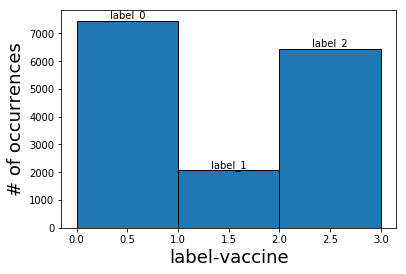

In [7]:
fig, ax = plt.subplots(1, 1)

ax.hist(df_train.label.values,range=[0,3],bins=3,edgecolor = 'black')
plt.xlabel('label-vaccine', fontsize = 18)
plt.ylabel('# of occurrences', fontsize = 18)
# Make some labels.
rects = ax.patches
labels = ["label_%d" % i for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
  
# Show plot
plt.show()

#### test set

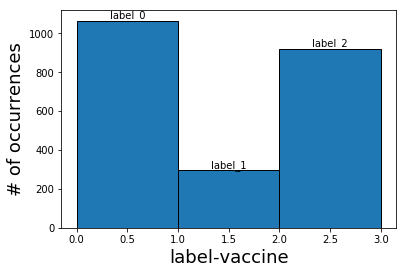

In [8]:
fig, ax = plt.subplots(1, 1)

ax.hist(df_test.label.values,range=[0,3],bins=3,edgecolor = 'black')
plt.xlabel('label-vaccine', fontsize = 18)
plt.ylabel('# of occurrences', fontsize = 18)
# Make some labels.
rects = ax.patches
labels = ["label_%d" % i for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
  
# Show plot
plt.show()

### Combining the labels with the vaccines to make the dataframe more readable

In [9]:
# create a list of our conditions
conditions = [
    (df_train['label'] == 0),
    (df_train['label'] == 1),
    (df_train['label'] == 2)
    ]
# create a list of the values we want to assign for each condition
values = ['neutral', 'anti-vax', 'pro-vax']

# create a new column and use np.select to assign values to it using our lists as arguments
df_train['vaccine'] = np.select(conditions, values)

# display updated DataFrame
df_train.head()


,Unnamed: 0,tweet,label,vaccine
0,0,Sip N Shop Come thru right now #Marjais #Popul...,0,neutral
1,1,I don't know about you but My family and I wil...,1,anti-vax
2,2,@MSignorile Immunizations should be mandatory....,2,pro-vax
3,3,President Obama spoke in favor of vaccination ...,0,neutral
4,4,"""@myfoxla: Arizona monitoring hundreds for mea...",0,neutral


In [10]:
# create a list of our conditions
conditions = [
    (df_test['label'] == 0),
    (df_test['label'] == 1),
    (df_test['label'] == 2)
    ]
# create a list of the values we want to assign for each condition
values = ['neutral', 'anti-vax', 'pro-vax']

# create a new column and use np.select to assign values to it using our lists as arguments
df_test['vaccine'] = np.select(conditions, values)

# display updated DataFrame
df_test.head()


,Unnamed: 0,tweet,label,vaccine
0,0,@user They had a massive surge in with covid d...,1,anti-vax
1,1,Required vaccines for school: Parents and guar...,0,neutral
2,2,“@KCStar: Two more Johnson County children hav...,0,neutral
3,3,NV can do better. Which states are the best (a...,2,pro-vax
4,4,Nothing like killing ourselves w/ our own fear...,2,pro-vax


### Error checking

In [11]:
#Check for null values
#In this case there are no missing values, so no action is needed
df_train.isnull().sum()

Unnamed: 0    0
tweet         0
label         0
vaccine       0
dtype: int64

In [12]:
df_test.isnull().sum()

Unnamed: 0    0
tweet         0
label         0
vaccine       0
dtype: int64

# Softmax model from sklearn

#### I transform tweets to vectors in order to pass them to the model

In [13]:
vectorizer = TfidfVectorizer()

# use the cv in our sets to convert the words
#passing the train and test set and validation set from the csv
X_train = vectorizer.fit_transform(df_train['tweet'])
X_test = vectorizer.transform(df_test['tweet'])
y_train = np.array(df_train['label']).reshape(-1,1)
y_test = np.array(df_test['label']).reshape(-1,1)

SM_model = LogisticRegression( multi_class='multinomial', solver='lbfgs',max_iter=10000)
SM_model.fit(X_train, y_train.ravel())
y_predict_lr = SM_model.predict(X_test)

Getting coefficients for every class of dataframe

In [14]:
SM_model.classes_

array([0, 1, 2])

Όπως βλέπουμε για την κλάση 0 το πρώτο feature δεν έχει μεγάλη απόκλιση από την μέση τιμή (ενδεικτική τιμή 0.2) , σε αντίθεση με το δεύτερο (ενδεικτική τιμή 0.6) όπου έχει πολύ μεγαλύτερη τιμή.Η μέση τιμή στην προκειμένη περίπτωση είναι κλάση 0 , δηλαδή neutral.

In [15]:
SM_model.coef_

array([[ 0.19464865,  0.59153453,  0.11937629, ...,  0.08347811,
         0.08347811,  0.08347811],
       [-0.20366406, -0.96671771, -0.03702462, ..., -0.02422091,
        -0.02422091, -0.02422091],
       [ 0.0090154 ,  0.37518318, -0.08235167, ..., -0.05925719,
        -0.05925719, -0.05925719]])

# Confusion matrix

Έχτισα τον πίνακα συγκρούσεων για να διαπιστώσω πόσα false positives έχω .Δηλαδή βλέποντας την πρώτη γραμμή του πίνακα βλέπω από τα 1065 neutral tweets 820 προβλέφτηκαν σωστά , 28 περάστηνκαν για antivax και 210 για provax.

In [16]:
confusion_matrix(y_test, y_predict_lr)

C = np.array(confusion_matrix(y_test, y_predict_lr))

confmtrx = pd.DataFrame(C, index=['neutral, true','anti-vax, true','pro-vax, true'],
columns=['neutral, predicted','anti-vax, predicted','pro-vax, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"neutral, predicted","anti-vax, predicted","pro-vax, predicted",sum
"neutral, true",820,28,217,1065
"anti-vax, true",43,130,123,296
"pro-vax, true",170,38,713,921
sum,1033,196,1053,2282


# Accuracy statistics

Διαπιστώνω ικανοποιητικά νούμερα για τα train και validation set που χρησιμοποίησα.Βέβαια για την κλάση 1 το recall και το f1 score είναι μικρά, πιθανόν γιατί έχουμε μικρό δείγμα.

In [17]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, y_predict_lr))  

#Create classification report
class_report=classification_report(y_test, y_predict_lr)
print(class_report)

Accuracy Score: 0.7287467134092901
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1065
           1       0.66      0.44      0.53       296
           2       0.68      0.77      0.72       921

    accuracy                           0.73      2282
   macro avg       0.71      0.66      0.68      2282
weighted avg       0.73      0.73      0.72      2282



# Learning curves

Χρησιμοποιώ samples για να μετρήσω το accuracy του μοντέλου ανάλογα με πόσα δεδομένα το κάνω train.Δημιουργώ μια λίστα από errors ώστε να βλέπω πώς αλλάζουν ανάλογα το training size.Μέσω αυτών θα δημιουργηθούν σημεία , τα αποία θα ενωθούν για να γίνουν οι καμπύλες μάθησης.

Γενικά οι καμπύλες μάθησης είναι ένα γράφημα που δείχνει χρόνο ή εμπειρία στον άξονα χ και μάθηση ή βελτίωση στον άξονα y.Τα Learning curves (LCs) αποδεικνύονται αποτελεσματικά εργαλεία μελέτης της απόδοσης των workers , όταν τους δίνεται ένα νέο task.Οι καμπύλες μάθησης παρουσιάζουν την διαδικασία μάθησης καθώς επαναλαμβάνονται διαδικασίες.

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df_train) // 10) for i in range (1,10)]

# keep track of the errors
err_test_list = []
err_train_list = []

#iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df_train.sample(n = size)

    #vectorize with min df param
    #ignore terms that appear in more than 1% of the documents
    vectorizer = TfidfVectorizer(min_df = 0.01)

    # use the cv in our sets to convert the words
    #use the trimmed csv for the training
    X_train = vectorizer.fit_transform(df_trimmed['tweet'])
    X_test = vectorizer.transform(df_test['tweet'])
    #and the complete validation set from the other csv
    y_train = np.array(df_trimmed['label']).reshape(-1,1)
    y_test = np.array(df_test['label']).reshape(-1,1)

    SM_model = LogisticRegression( multi_class='multinomial', solver='lbfgs',max_iter=10000)
    SM_model.fit(X_train, y_train.ravel())
    y_test_lr = SM_model.predict(X_test)
    y_train_lr = SM_model.predict(X_train)
    
    err_test = f1_score(y_test, y_test_lr, average='weighted')
    err_train = f1_score(y_train, y_train_lr, average='weighted')
    # append its last value to the list
    err_test_list.append(err_test)
    err_train_list.append(err_train)

print(err_test_list)
print(err_train_list)

[0.6260752900042735, 0.6499097071034434, 0.6622365493101543, 0.6613054623384989, 0.6643104877644547, 0.6750864594245549, 0.6768101885666219, 0.6741442979188164, 0.6772197690487081]
[0.7077867217255861, 0.7003369335852264, 0.7062719367196986, 0.6949170163672136, 0.6855048831473236, 0.6937325750296243, 0.6850101646668034, 0.6814383404249236, 0.6862713730667358]


Το min_df = 0.01 παρατηρώ ότι βοηθάει στην ομαλοποίηση των καμπυλών ώστε να έχουμε μια πιο καλή αποτύπωση των errors

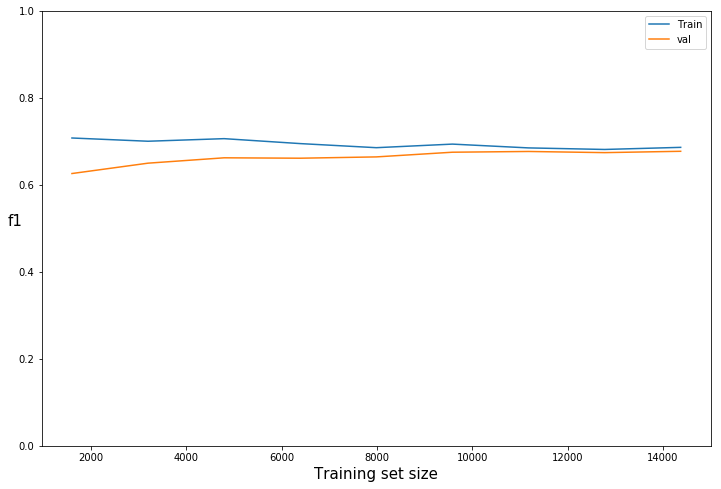

In [19]:
#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.legend(loc='best')
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("f1", rotation=0, fontsize=15)
plt.gca().set_ylim([0,1])
plt.show()

Χαρακτηριστικά των καλών μοντέλων , χωρίς overfit , underfit :

### Interpreting the training loss
#### Learning curve of a good fit model has a moderately high training loss at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on training data.
### Interpreting the validation loss
#### Learning curve of a good fit model has a high validation loss at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on unseen data.
#### We can also see that upon adding a reasonable number of training examples, both the training and validation loss moved close to each other.
### Typical features of the learning curve of a good fit model
#### Training loss and Validation loss are close to each other with validation loss being slightly greater than the training loss.
#### Initially decreasing training and validation loss and a pretty flat training and validation loss after some point till the end.

Είναι πολύ καλό που σταθεροποιούνται οι καμπύλες καθώς προχωράει το training size καθώς και ότι οι καμπύλες συγκλίνουν σταδιακά.Δηλαδή το ότι το training error μειώνεται φανερώνει ότι δεν έχουμε underfit και το ότι συγκλίνουν οι καμπύλες δείχνει ότι δεν έχουμε overfit.

## Parameter tweaking

In [20]:
vectorizer = TfidfVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df_train['tweet'],df_train['label'], test_size = 0.2, random_state = 42)

# use the cv in our sets to convert the words
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)

SM_model = LogisticRegression( multi_class='multinomial', solver='lbfgs',max_iter=10000)
SM_model.fit(X_train, y_train.ravel())
y_predict_lr = SM_model.predict(X_test)

In [21]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, y_predict_lr))  

#Create classification report
class_report=classification_report(y_test, y_predict_lr)
print(class_report)

Accuracy Score: 0.7215269086357947
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1488
           1       0.67      0.31      0.42       415
           2       0.67      0.78      0.72      1293

    accuracy                           0.72      3196
   macro avg       0.71      0.62      0.64      3196
weighted avg       0.72      0.72      0.71      3196



In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df_train) // 10) for i in range (1,10)]

# keep track of the errors
err_test_list = []
err_train_list = []

#iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df_train.sample(n = size)

    vectorizer = TfidfVectorizer(min_df = 0.01)

    X_train, X_test, y_train, y_test = train_test_split(df_trimmed['tweet'],df_trimmed['label'], test_size = 0.2, random_state = 42)

    # use the cv in our sets to convert the words
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    y_train = np.array(y_train).reshape(-1,1)

    SM_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
    SM_model.fit(X_train, y_train.ravel())
    y_test_lr = SM_model.predict(X_test)
    y_train_lr = SM_model.predict(X_train)
    
    err_test = f1_score(y_test, y_test_lr, average='weighted')
    err_train = f1_score(y_train, y_train_lr, average='weighted')
    # append its last value to the list
    err_test_list.append(err_test)
    err_train_list.append(err_train)

print(err_test_list)
print(err_train_list)

[0.6086638218446627, 0.6611103600080942, 0.6551763646367544, 0.6674972995035332, 0.6690421803673866, 0.6865491822101805, 0.6650457903104046, 0.6461134614131739, 0.675364363595122]
[0.7263974774513583, 0.7269275440432728, 0.7031809046931669, 0.6940550286659334, 0.6921379814544513, 0.688227128946334, 0.6918901951440729, 0.693119954715522, 0.6892760254833822]


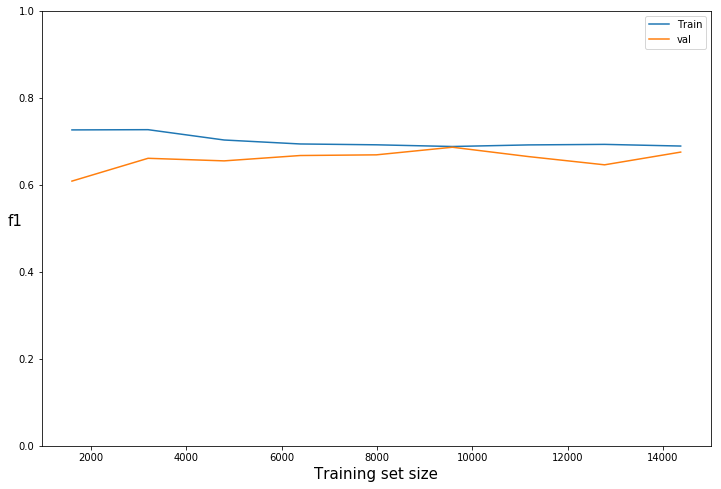

In [23]:
#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.legend(loc='best')
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("f1", rotation=0, fontsize=15)
plt.gca().set_ylim([0,1])
plt.show()

Παρατηρώ ότι με train test split δεν έχει μεγάλη διαφορά από όταν βάζουμε το validation set για δοκιμές

In [24]:
!pip3 install stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

In [25]:
vectorizer = TfidfVectorizer(max_df=0.5,sublinear_tf=True,stop_words=stopwords,use_idf=True, ngram_range=(1,2),norm = 'l2',decode_error='ignore',analyzer='word')

# use the cv in our sets to convert the words
#passing the train and test set and validation set from the csv
X_train = vectorizer.fit_transform(df_train['tweet'])
X_test = vectorizer.transform(df_test['tweet'])
y_train = np.array(df_train['label']).reshape(-1,1)
y_test = np.array(df_test['label']).reshape(-1,1)

SM_model = LogisticRegression( multi_class='multinomial', solver='saga',max_iter=20000)
SM_model.fit(X_train, y_train.ravel())
y_predict_lr = SM_model.predict(X_test)

In [26]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, y_predict_lr))  

#Create classification report
class_report=classification_report(y_test, y_predict_lr)
print(class_report)

Accuracy Score: 0.738387379491674
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1065
           1       0.72      0.40      0.51       296
           2       0.67      0.82      0.74       921

    accuracy                           0.74      2282
   macro avg       0.74      0.66      0.68      2282
weighted avg       0.75      0.74      0.73      2282



Παρατηρώ μια μικρή βελτίωση της τάξης του 0.01 στην απόδοση (1%)

In [27]:

import numpy as np
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df_train) // 20) for i in range (1,20)]

# keep track of the errors
err_test_list = []
err_train_list = []

#iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df_train.sample(n = size)

    vectorizer = TfidfVectorizer(max_df=1,min_df = 0.00001)

    X_train, X_test, y_train, y_test = train_test_split(df_trimmed['tweet'],df_trimmed['label'], test_size = 0.95, random_state = 42)

    # use the cv in our sets to convert the words
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    y_train = np.array(y_train).reshape(-1,1)

    SM_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
    SM_model.fit(X_train, y_train.ravel())
    y_test_lr = SM_model.predict(X_test)
    y_train_lr = SM_model.predict(X_train)
    
    err_test = f1_score(y_test, y_test_lr, average='weighted')
    err_train = f1_score(y_train, y_train_lr, average='weighted')
    # append its last value to the list
    err_test_list.append(err_test)
    err_train_list.append(err_train)

print(err_test_list)
print(err_train_list)

[0.43108744201834653, 0.34596173358408555, 0.4406873641734466, 0.4547854292055047, 0.4266445926149967, 0.42599005574194937, 0.44098996288507497, 0.4230960532988045, 0.4253589758438398, 0.41084464645633834, 0.43852086016920366, 0.4173535167947243, 0.41934866433773865, 0.44307510468815553, 0.4245831265297801, 0.4266788290504341, 0.43721410053896526, 0.4201328499932456, 0.44303371526526736]
[0.851037851037851, 0.8884009299922498, 0.8421015465009533, 0.8481211961465571, 0.7961959469380294, 0.817281832095021, 0.7832319483108224, 0.8180422602350124, 0.8252042662314728, 0.863764984929769, 0.7532339138573132, 0.7722062010906271, 0.8112123893373894, 0.7907242522043281, 0.8108311362085069, 0.7984117362100777, 0.7992142382317503, 0.7744467386117975, 0.8001831914281603]


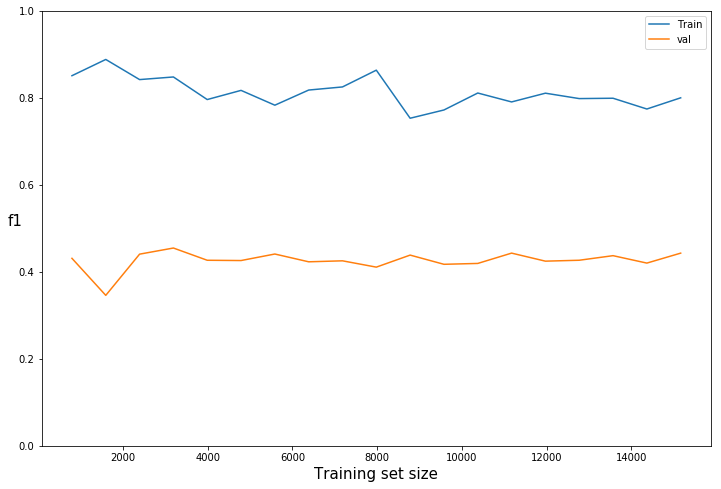

In [28]:
#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.legend(loc='best')
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("f1", rotation=0, fontsize=15)
plt.gca().set_ylim([0,1])
plt.show()

Παρατηρώ ότι οι αλλαγές στον vectorizer χαλάνε το σκορ στο validation set

## Μερικά πράγματα που έμαθα από την εργασία:
#### 1.Πως να μελετάω τα αρχικά δεδομένα για να παίρνω μια γενική ιδέα για αυτά.
#### 2.Πως να μαθαίνω να εκτελώ μοντέλα μάθησης(όπως αυτό της softmax λογιστικής παλινδρόμησης ) για να αποκτάω πληροφορίες από αυτά
#### 3.Πως να μαθαίνω την απόδοση των δεδομένων και να παρουσιάζω γραφηματα για τα αποτελέσματα τους
#### 4.Πως να χρησιμοποιώ τις καμπύλες μάθησης για να βλέπω πως εξελίσσεται η απόδοση του μοντέλου ανάλογα του συνόλου εκπαίδευσης.
#### Αυτή είναι πολύ χρίσιμη πληροφορία για να βλέπω τα λάθη του μοντέλου (overfit,underfit, proper fit)
#### 5.Πως να πειραματίζομαι με την υλοποίηση μου και να δημιουργώ ένα ολοκληρωμένο report.

## Βιβλιογραφία :
#### https://machinelearningmastery.com/
#### http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/
#### https://www.kaggle.com/fengdanye/machine-learning-3-logistic-and-softmax-regression
#### https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#### https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
#### https://www.l3harrisgeospatial.com/docs/enviconfusionmatrix.html
#### https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5